# What is regularization:

*Regularization refers to a set of different techniques that lower the complexity of a neural network model during training,
and thus prevent the overfitting.



# Lasso:

*Least Absolute Shrinkage and Selection Operator 
*If a model uses the L1 regularization technique, then it is called lasso regression. 
*Adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function 
*Also performs automatic feature selection 


# Ridge:

*Ridge regression is also referred to as L2 Regularization.
*Adds the "squared magnitude" of the coefficient as the penalty term to the loss function. 

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV

In [39]:
df_test=pd.read_csv("/Users/ayushsingh/Downloads/ADVANCE MACHINE LEARNING/test-.csv")
df_train=pd.read_csv("/Users/ayushsingh/Downloads/ADVANCE MACHINE LEARNING/train.csv")

# Basic Analysis

In [40]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [42]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [43]:
df_test['MSSubClass'].unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150])

In [44]:
df_test['MSSubClass'].nunique()

16

In [45]:
for i in df_train.columns:
    if df_train[i].isnull().any() == True:
        print(i,end = " ")
        print(df_train.loc[lambda df_train : df_train[i].isnull() == True].shape[0])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [46]:
df_train["Electrical"].fillna(df_train["Electrical"].mode()[0],inplace = True)

# Encoding

In [47]:
numeric_feature = df_train.select_dtypes(include=["int64","float64"]).columns
numeric_feature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [48]:
categorical_feature = df_train.select_dtypes(exclude=["int64","float64"]).columns
categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
Ord_encoder = OrdinalEncoder()

In [50]:
for i in categorical_feature:
    df_train[[i]] = Ord_encoder.fit_transform(df_train[[i]])
    df_test[[i]] = Ord_encoder.fit_transform(df_test[[i]])

In [51]:
df_train.dtypes.value_counts()

float64    46
int64      35
dtype: int64

In [52]:
df_test.dtypes.value_counts()

float64    54
int64      26
dtype: int64

# Outlier Analysis & Removal


<AxesSubplot:xlabel='SalePrice'>

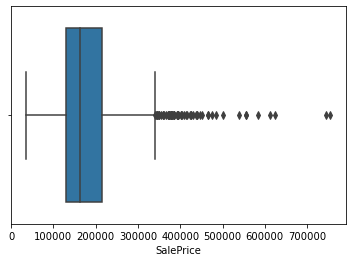

In [53]:
sns.boxplot(x= df_train.SalePrice)

In [54]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [55]:
z = np.abs(stats.zscore(df_train.SalePrice))

In [56]:
df_train.drop(np.where(z>3)[0],axis = 0,inplace = True)

In [57]:
df_train.shape

(1438, 81)

In [58]:
df_train.fillna(method = "bfill", inplace = True )

In [59]:
df_test.fillna(method = "bfill", inplace = True )

<AxesSubplot:xlabel='SalePrice'>

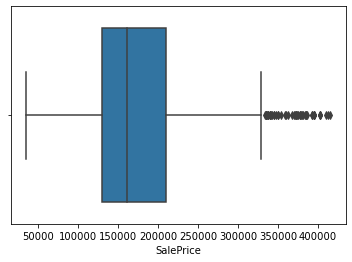

In [60]:
sns.boxplot(x= df_train.SalePrice)

In [61]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129500.0
0.50    161500.0
0.75    210000.0
Name: SalePrice, dtype: float64

# Splitting of data

In [62]:
X = df_train.drop("SalePrice",axis = 1)


In [63]:
Y = df_train.SalePrice

In [70]:
X.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Important Feature Selection

In [73]:
fs = SelectKBest(score_func=f_regression, k=50)


In [74]:
X.fillna(method = "ffill", inplace = True )


In [75]:
X_selected = fs.fit_transform(X, Y)


In [76]:
X_selected

array([[3.000e+00, 6.500e+01, 8.450e+03, ..., 6.100e+01, 0.000e+00,
        4.000e+00],
       [3.000e+00, 8.000e+01, 9.600e+03, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 1.125e+04, ..., 4.200e+01, 0.000e+00,
        4.000e+00],
       ...,
       [3.000e+00, 6.600e+01, 9.042e+03, ..., 6.000e+01, 0.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.120e+02,
        4.000e+00],
       [3.000e+00, 7.500e+01, 9.937e+03, ..., 6.800e+01, 0.000e+00,
        4.000e+00]])

In [77]:
X_selected.shape

(1438, 50)

# Model Selection

In [78]:
x_train,x_test, y_train, y_test = train_test_split(X_selected,Y)


# Lasso with cv

In [93]:
la = LassoCV()

In [94]:
la.fit(x_train,y_train)


LassoCV()

In [95]:
yl = la.predict(x_test)
r2_score(y_test,yl)

0.7641580071606332

# Ridge with cv

In [96]:
ri = RidgeCV()

In [97]:
ri.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [98]:
yr = ri.predict(x_test)
r2_score(y_test,yr)

0.8515386365523712

# Linear Regression

In [99]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
yp = lr.predict(x_test)
r2_score(y_test,yp)

0.8495973645110994

# Random Forest

In [101]:
rf = RandomForestRegressor(max_depth=100,n_estimators=500)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=500)

In [102]:
ypr = rf.predict(x_test)
r2_score(y_test,ypr)

0.880629960276319


# Hyperparameter Tuning

In [103]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}

In [109]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [110]:
model_cv.best_params_

{'alpha': 5.0}

In [112]:
model_cv.best_estimator_

Lasso(alpha=5.0)

In [113]:
alpha = model_cv.best_estimator_.alpha
# max_iter = model_cv.best_estimator_.max_iter
lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)
lasso.coef_

array([-4.22574176e+03, -6.57413945e+01,  5.02655494e-01, -1.53896125e+03,
        3.88742152e+02, -1.96165338e+02, -2.27133429e+03,  1.21026235e+04,
        5.51101982e+01,  2.24904397e+02,  2.57142549e+03, -1.45237173e+03,
        9.50621370e+02,  1.22387763e+01, -6.10556925e+03,  1.48919184e+03,
        1.21120805e+03, -6.50058214e+03, -2.55199929e+03, -4.12924390e+00,
       -5.20233913e+00,  1.18509511e+00, -3.89204278e+03, -1.32131520e+03,
        3.98088932e+03, -6.86465282e+02,  3.92289458e+01,  3.19470898e+01,
       -4.42458047e+00,  1.08360575e+04,  5.15509630e+02,  1.51257220e+03,
        1.80450867e+03, -2.17561970e+04, -7.97667034e+03,  2.77079976e+03,
        4.12552618e+03,  5.80991903e+03, -1.07316585e+03, -1.67806937e+02,
       -2.90923386e+03,  1.23198474e+04,  8.44856461e+00,  9.99080222e+01,
        1.59557374e+03,  4.34822445e+03,  2.92462108e+01, -9.17254953e+00,
       -9.18416965e+00,  2.53549954e+03])

In [114]:
y_pred = lasso.predict(x_test)
print(r2_score(y_pred, y_test))

0.819313975352983


In [119]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 


Fitting 10 folds for each of 33 candidates, totalling 330 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [120]:
model_cv.best_estimator_

Ridge(alpha=7.0)

In [121]:
alpha = model_cv.best_estimator_.alpha
ridge= Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
lasso.coef_

array([-4.22574176e+03, -6.57413945e+01,  5.02655494e-01, -1.53896125e+03,
        3.88742152e+02, -1.96165338e+02, -2.27133429e+03,  1.21026235e+04,
        5.51101982e+01,  2.24904397e+02,  2.57142549e+03, -1.45237173e+03,
        9.50621370e+02,  1.22387763e+01, -6.10556925e+03,  1.48919184e+03,
        1.21120805e+03, -6.50058214e+03, -2.55199929e+03, -4.12924390e+00,
       -5.20233913e+00,  1.18509511e+00, -3.89204278e+03, -1.32131520e+03,
        3.98088932e+03, -6.86465282e+02,  3.92289458e+01,  3.19470898e+01,
       -4.42458047e+00,  1.08360575e+04,  5.15509630e+02,  1.51257220e+03,
        1.80450867e+03, -2.17561970e+04, -7.97667034e+03,  2.77079976e+03,
        4.12552618e+03,  5.80991903e+03, -1.07316585e+03, -1.67806937e+02,
       -2.90923386e+03,  1.23198474e+04,  8.44856461e+00,  9.99080222e+01,
        1.59557374e+03,  4.34822445e+03,  2.92462108e+01, -9.17254953e+00,
       -9.18416965e+00,  2.53549954e+03])

In [123]:
y_r = ridge.predict(x_test)


In [124]:
r2_score(y_test,y_r)

0.8510786388195289